In [14]:
import pandas as pd
# import plotting libraries

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/home/redne/mnt/zerowaste_blob/project_zero/experiments/ds01_v1/ds01_v1_052420.csv")
df.drop("index", axis=1,inplace=True)
df.head()

,id,category,rect,pixels,xmin,ymin,xmax,ymax,bbox,filename,height,width,iter_num,camera_scene,shape_id
0,1,fork,"[1195, 302, 121, 30]",1782,1195,302,1316,332,"[1195, 302, 121, 30]",iter0_InstanceGroup2Desccamera_0camera_Shape0_...,1080,1920,iter0,0camera,Shape0
1,2,coffeeCup,"[899, 276, 222, 236]",29705,899,276,1121,512,"[899, 276, 222, 236]",iter0_InstanceGroup2Desccamera_0camera_Shape0_...,1080,1920,iter0,0camera,Shape0
2,3,clearCup,"[619, 395, 257, 167]",34122,619,395,876,562,"[619, 395, 257, 167]",iter0_InstanceGroup2Desccamera_0camera_Shape0_...,1080,1920,iter0,0camera,Shape0
3,4,clearCup,"[1230, 0, 142, 155]",12867,1230,0,1372,155,"[1230, 0, 142, 155]",iter0_InstanceGroup2Desccamera_0camera_Shape0_...,1080,1920,iter0,0camera,Shape0
4,5,clearCup,"[331, 0, 80, 41]",2616,331,0,411,41,"[331, 0, 80, 41]",iter0_InstanceGroup2Desccamera_0camera_Shape0_...,1080,1920,iter0,0camera,Shape0


list of unique objects in dataset

['fork', 'coffeeCup', 'clearCup', 'spoon', 'knife']


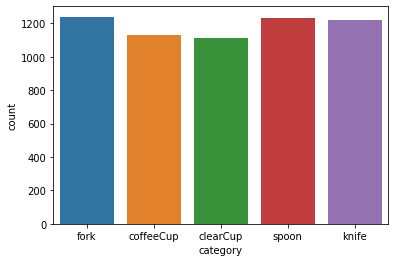

In [15]:
print("list of unique objects in dataset\n")
print(list(df.category.unique()))
sns.countplot(df.category);

__Only used 3 combined `ms_utincles` category in DS0 approach and not in DS1__

list of unique objects in dataset

['ms_utincles', 'coffeeCup', 'clearCup']


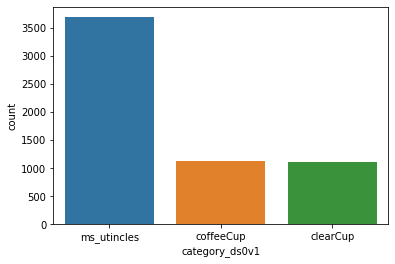

In [13]:
## DO NOT RUN IF NOT DS0 EXPERIMENT!
ms_utincles_cat = ['fork', 'spoon', 'knife']
df["category_ds0v1"] = df.category
df.loc[df.category.isin(ms_utincles_cat), "category_ds0v1"] = "ms_utincles"
ds0v1_categories = list(df.category_ds0v1.unique())
print("list of unique objects in dataset\n")
print(ds0v1_categories)
sns.countplot(df.category_ds0v1);

---- 
### TODO> Any needed Preprocessing

.....

-----
# Experiment 1: DS1 All RAW_RENDERINGS

In [18]:
#core_train_data = df[df.category_ds0v1.isin(ds0v1_categories)]
#core_train_data.drop("category", axis=1, inplace=True)
#core_train_data.rename(columns={'category_ds0v1':'category'}, inplace=True)
#core_train_data = core_train_data[core_train_data.category.isin(core_categories)]

core_train_data = df
category_count = core_train_data.groupby("category")['pixels'].count().reset_index()
category_count.columns = ['category', 'count']
category_count

,category,count
0,clearCup,1110
1,coffeeCup,1130
2,fork,1240
3,knife,1220
4,spoon,1230


### EVEN DISTRIBUTION

In [19]:
#> from ZW dataset img process 2019
#base_train_df = core_train_data[core_train_data.category.isin(under_sample_categories)]
#included_filenames = list(df_800.filename.unique()) + list(base_train_df.filename.unique())
#included_categories = list(df_800.category.unique())+ list(base_train_df.category.unique())

#df_even_df_final = core_train_data[(core_train_data.filename.isin(included_filenames)) & (core_train_data.category.isin(included_categories))]
#df_even_df_final = core_train_data[core_train_data.filename.isin(dev_filenames)]

df_even_df_final = df

from sklearn.model_selection import GroupShuffleSplit
train_inds, test_inds = next(GroupShuffleSplit(test_size=.25, n_splits=2, 
                                               random_state = 42).split(df_even_df_final, groups=df_even_df_final.filename))
df_even_df_final.rename(columns={'category':'class'}, inplace=True)


train_df_tmp = df_even_df_final.iloc[train_inds]
test_df = df_even_df_final.iloc[test_inds]

train_inds, val_inds = next(GroupShuffleSplit(test_size=.1, n_splits=2, 
                                               random_state = 42).split(train_df_tmp, groups=train_df_tmp['filename']))


train_df = train_df_tmp.iloc[train_inds]
val_df = train_df_tmp.iloc[val_inds]

# summer distribution table
core_summary_df = pd.DataFrame([train_df['class'].value_counts(), test_df['class'].value_counts(), val_df['class'].value_counts()]).T.reset_index()
core_summary_df = core_summary_df.join(category_count.set_index('category'), on='index', how='left')
core_summary_df.columns = ['category','train', 'test', 'val','df_total']
core_summary_df.style.hide_index()


category,train,test,val,df_total
fork,823,328,89,1240
knife,822,307,91,1220
spoon,817,331,82,1230
coffeeCup,748,289,93,1130
clearCup,734,284,92,1110


In [20]:
test_sample_fileName = df_even_df_final.filename.sample(n=1).values[0]
print("image filename: ",test_sample_fileName)
#train_df[train_df.filename.str.contains(test_sample_fileName)].head()
print("train count: ",len(train_df[train_df.filename.str.contains(test_sample_fileName)]))

print("test count: ", len(test_df[test_df.filename.str.contains(test_sample_fileName)]))

#val_df[val_df.filename.str.contains(test_sample_fileName)].head()
print("val count: ", len(val_df[val_df.filename.str.contains(test_sample_fileName)]))

image filename:  iter258_InstanceGroup2Desccamera_0camera_Shape0_rgb.jpg
train count:  16
test count:  0
val count:  0


In [22]:
#csv_path = '/home/redne/zw_torch/experiments/ds0/ds0_1/'
csv_path = '/home/redne/mnt/zerowaste_blob/project_zero/experiments/ds01_v1/'
print("* of Images in train: ",len(train_df.filename.unique()))
print("* of Images in test: ",len(test_df.filename.unique()))
print("* of Images in val: ",len(val_df.filename.unique()))

* of Images in train:  337
* of Images in test:  125
* of Images in val:  38


In [23]:
df_even_df_final.to_csv(csv_path + "ds01_v1_dataset_052420.csv")
train_df.reset_index().to_csv(csv_path + "train_labels.csv")
test_df.reset_index().to_csv(csv_path + "test_labels.csv")
val_df.reset_index().to_csv(csv_path + "val_labels.csv")

print("classes for training: ", sorted(list(df_even_df_final["class"].unique()), reverse=False))

num_classes = len(df_even_df_final["class"].unique())
print(num_classes)

classes for training:  ['clearCup', 'coffeeCup', 'fork', 'knife', 'spoon']
5


```python
def class_text_to_int(row_label):
    if row_label == 'clearCup':
        return 1
    elif row_label == 'coffeeCup':
        return 2
    elif row_label == 'fork':
        return 3
    elif row_label == 'knife':
        return 4
    elif row_label == 'spoon':
        return 5
    else:
```

#### Labelmap

```json
item {
  id:1
  name:'clearCup'
}
item {
  id:2
  name:'coffeeCup'
}
item {
  id:3
  name:'fork'
}
item {
  id:4
  name:'knife'
}
item {
  id:5
  name:'spoon'
}
```

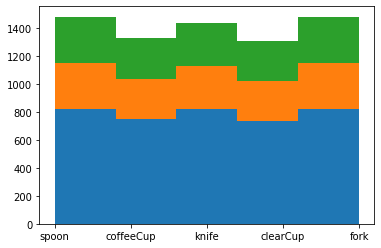

In [24]:
plt.hist([
        train_df['class'], 
        test_df['class'], 
        test_df['class']
        ], 
        stacked=True, 
        label=["train", "test", "val"],
        bins=num_classes
    )

plt.show()

Total files that contains more than 10 object in image: 240


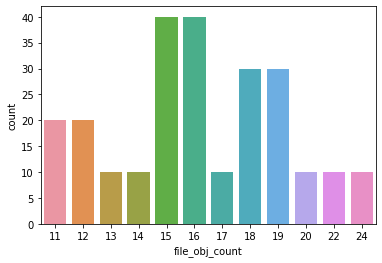

In [25]:
min_obj_num_in_image = 10
filename_count = df_even_df_final['filename'].value_counts().reset_index()
filename_count.rename(columns={'filename':'file_obj_count','index':'filename'}, inplace=True)

sns.countplot(x="file_obj_count", data=filename_count[filename_count.file_obj_count > min_obj_num_in_image])
total_min_obj_count = len(filename_count[filename_count.file_obj_count > min_obj_num_in_image])
print(f'Total files that contains more than {min_obj_num_in_image} object in image: {total_min_obj_count}')

-----
# Experiment 0: DS0.0 RAW_RENDERINGS

In [63]:
core_train_data = df[df.category_ds0v1.isin(ds0v1_categories)]
core_train_data.drop("category", axis=1, inplace=True)
core_train_data.rename(columns={'category_ds0v1':'category'}, inplace=True)
#core_train_data = core_train_data[core_train_data.category.isin(core_categories)]

category_count = core_train_data.groupby("category")['pixels'].count().reset_index()
category_count.columns = ['category', 'count']
category_count

,category,count
0,clearCup,1110
1,coffeeCup,1130
2,ms_utincles,3690


### EVEN DISTRIBUTION

In [64]:
sample_threshold = 2000
under_sample_categories = list(category_count[category_count["count"]<sample_threshold].category)
dev_filenames = core_train_data[core_train_data.category.isin(under_sample_categories)].filename

print("number of (unique) image files in dataset: ", len(dev_filenames.unique()))
df_800_count = core_train_data[core_train_data.filename.isin(dev_filenames)].groupby("category")['pixels'].count().reset_index()
df_800_count.columns = ['category', 'count']
df_800_count

number of (unique) image files in dataset:  500


,category,count
0,clearCup,1110
1,coffeeCup,1130
2,ms_utincles,3690


In [66]:
#> from ZW dataset img process 2019
#base_train_df = core_train_data[core_train_data.category.isin(under_sample_categories)]
#included_filenames = list(df_800.filename.unique()) + list(base_train_df.filename.unique())
#included_categories = list(df_800.category.unique())+ list(base_train_df.category.unique())

#df_even_df_final = core_train_data[(core_train_data.filename.isin(included_filenames)) & (core_train_data.category.isin(included_categories))]
df_even_df_final = core_train_data[core_train_data.filename.isin(dev_filenames)]

from sklearn.model_selection import GroupShuffleSplit
train_inds, test_inds = next(GroupShuffleSplit(test_size=.25, n_splits=2, 
                                               random_state = 42).split(df_even_df_final, groups=df_even_df_final.filename))
df_even_df_final.rename(columns={'category':'class'}, inplace=True)


train_df_tmp = df_even_df_final.iloc[train_inds]
test_df = df_even_df_final.iloc[test_inds]

train_inds, val_inds = next(GroupShuffleSplit(test_size=.1, n_splits=2, 
                                               random_state = 42).split(train_df_tmp, groups=train_df_tmp['filename']))


train_df = train_df_tmp.iloc[train_inds]
val_df = train_df_tmp.iloc[val_inds]

# summer distribution table
core_summary_df = pd.DataFrame([train_df['class'].value_counts(), test_df['class'].value_counts(), val_df['class'].value_counts()]).T.reset_index()
core_summary_df = core_summary_df.join(category_count.set_index('category'), on='index', how='left')
core_summary_df.columns = ['category','train', 'test', 'val','df_total']
core_summary_df.style.hide_index()


category,train,test,val,df_total
ms_utincles,2462,966,262,3690
coffeeCup,748,289,93,1130
clearCup,734,284,92,1110


In [69]:
test_sample_fileName = df_even_df_final.filename.sample(n=1).values[0]
print("image filename: ",test_sample_fileName)
#train_df[train_df.filename.str.contains(test_sample_fileName)].head()
print("train count: ",len(train_df[train_df.filename.str.contains(test_sample_fileName)]))

print("test count: ", len(test_df[test_df.filename.str.contains(test_sample_fileName)]))

#val_df[val_df.filename.str.contains(test_sample_fileName)].head()
print("val count: ", len(val_df[val_df.filename.str.contains(test_sample_fileName)]))

image filename:  iter452_InstanceGroup2Desccamera_0camera_Shape0_rgb.jpg
train count:  0
test count:  9
val count:  0


In [70]:
#csv_path = '/home/redne/zw_torch/experiments/ds0/ds0_1/'
csv_path = '/mnt/zerowaste_blob/project_zero/experiments/ds0_v1/'
print("* of Images in train: ",len(train_df.filename.unique()))
print("* of Images in test: ",len(test_df.filename.unique()))
print("* of Images in val: ",len(val_df.filename.unique()))

* of Images in train:  337
* of Images in test:  125
* of Images in val:  38


In [71]:
df_even_df_final.to_csv(csv_path + "ds0_v1_dataset_052420.csv")
train_df.reset_index().to_csv(csv_path + "train_labels.csv")
test_df.reset_index().to_csv(csv_path + "test_labels.csv")
val_df.reset_index().to_csv(csv_path + "val_labels.csv")

print("classes for training: ", sorted(list(df_even_df_final["class"].unique()), reverse=False))

num_classes = len(df_even_df_final["class"].unique())
print(num_classes)

classes for training:  ['clearCup', 'coffeeCup', 'ms_utincles']
3


In [87]:
tr2= train_df[['filename', 'bbox', 'width', 'height']]
tr2.rename(columns={'filename':'imgname','bbox':'bboxes'}, inplace=True)
tr2.reset_index().to_csv("./" + "tr_label.csv", index=False)

In [88]:
test2= test_df[['filename', 'bbox', 'width', 'height']]
test2.rename(columns={'filename':'imgname','bbox':'bboxes'}, inplace=True)
test2.reset_index().to_csv("./" + "atest_label.csv", index=False)

In [89]:
val2= val_df[['filename', 'bbox', 'width', 'height']]
val2.rename(columns={'filename':'imgname','bbox':'bboxes'}, inplace=True)
val2.reset_index().to_csv("./" + "aval_label.csv", index=False)

In [96]:
import numpy as np
np.array(tr2.bboxes[24].values)

AttributeError: 'str' object has no attribute 'values'

In [82]:
train_df.head()

,id,rect,pixels,xmin,ymin,xmax,ymax,bbox,filename,height,width,iter_num,camera_scene,shape_id,class
24,0,"[825, 17, 51, 79]",652,825,17,876,96,"[825, 17, 51, 79]",iter102_InstanceGroup2Desccamera_0camera_Shape...,1080,1920,iter102,0camera,Shape0,ms_utincles
25,1,"[1199, 24, 218, 170]",27251,1199,24,1417,194,"[1199, 24, 218, 170]",iter102_InstanceGroup2Desccamera_0camera_Shape...,1080,1920,iter102,0camera,Shape0,coffeeCup
26,2,"[994, 332, 205, 153]",22963,994,332,1199,485,"[994, 332, 205, 153]",iter102_InstanceGroup2Desccamera_0camera_Shape...,1080,1920,iter102,0camera,Shape0,coffeeCup
27,3,"[739, 534, 94, 65]",2000,739,534,833,599,"[739, 534, 94, 65]",iter102_InstanceGroup2Desccamera_0camera_Shape...,1080,1920,iter102,0camera,Shape0,ms_utincles
28,4,"[1184, 55, 101, 14]",980,1184,55,1285,69,"[1184, 55, 101, 14]",iter102_InstanceGroup2Desccamera_0camera_Shape...,1080,1920,iter102,0camera,Shape0,ms_utincles


```python
def class_text_to_int(row_label):
    if row_label == 'clearCup':
        return 1
    elif row_label == 'coffeeCup':
        return 2
    elif row_label == 'ms_utincles':
        return 3
    else:
```

#### Labelmap

```json
item {
  id:1
  name:'clearCup'
}
item {
  id:2
  name:'cofafeeCup'
}
item {
  id:3
  name:'ms_utincles'
}
```

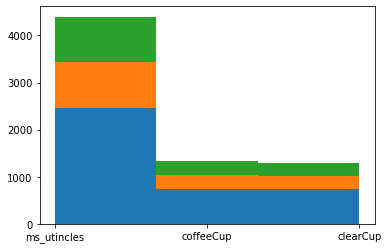

In [72]:
plt.hist([
        train_df['class'], 
        test_df['class'], 
        test_df['class']
        ], 
        stacked=True, 
        label=["train", "test", "val"],
        bins=num_classes
    )

plt.show()

Total files that contains more than 10 object in image: 240


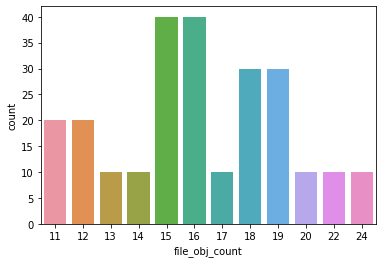

In [73]:
min_obj_num_in_image = 10
filename_count = df_even_df_final['filename'].value_counts().reset_index()
filename_count.rename(columns={'filename':'file_obj_count','index':'filename'}, inplace=True)

sns.countplot(x="file_obj_count", data=filename_count[filename_count.file_obj_count > min_obj_num_in_image])
total_min_obj_count = len(filename_count[filename_count.file_obj_count > min_obj_num_in_image])
print(f'Total files that contains more than {min_obj_num_in_image} object in image: {total_min_obj_count}')

# TFRecord Generation

```


sudo mkdir /mnt/blobfusetmp 
sudo chown $USER /mnt/blobfusetmp 
blobfuse ~/ZeroWaste/mnt/zerowaste_blob --tmp-path=/mnt/blobfusetmp  --config-file=/home/$USER/ZeroWaste/mnt/zerowaste_blob_connection.cfg -o attr_timeout=240 -o entry_timeout=240 -o negative_timeout=120 -o allow_other 

#redne@wakanda:~ 
sh mount_fileshare.sh

nvidia-docker run -it -v /home/$USER/ZeroWaste:/ZeroWaste -p 8888:8888 -p 6006:6006 tensorflow/tensorflow:1.12.0-gpu-py3 bash

pip3 install tqdm

cd /ZeroWaste/training
echo "export PYTHONPATH=$(pwd)/models:$(pwd)/models/research:$(pwd)/models/research/slim:$(pwd)/cocoapi/PythonAPI" >> ~/.bashrc
cd models/research/
export PYTHONPATH=$PYTHONPATH:`pwd`:`pwd`/slim
cd /ZeroWaste

cd /ZeroWaste/training/models/research/

# pullsing images from fileshare mount

python generate_tfrecord_custom.py --csv_input=/ZeroWaste/mnt/zerowaste_blob/project_zero/experiments/ds01_v1/train_labels.csv --image_dir=/ZeroWaste/mnt/zerowasteimages/project_zero/ds1/parsed/ --output_path=/ZeroWaste/mnt/zerowaste_blob/project_zero/experiments/ds01_v1/train.tfrecord

python generate_tfrecord_custom.py --csv_input=/ZeroWaste/mnt/zerowaste_blob/project_zero/experiments/ds01_v1/test_labels.csv --image_dir=/ZeroWaste/mnt/zerowasteimages/project_zero/ds1/parsed/ --output_path=/ZeroWaste/mnt/zerowaste_blob/project_zero/experiments/ds01_v1/test.tfrecord

python generate_tfrecord_custom.py --csv_input=/ZeroWaste/mnt/zerowaste_blob/project_zero/experiments/ds01_v1/val_labels.csv --image_dir=/ZeroWaste/mnt/zerowasteimages/project_zero/ds1/parsed/ --output_path=/ZeroWaste/mnt/zerowaste_blob/project_zero/experiments/ds01_v1/val.tfrecord
```

---
### DS01_v1

root@2949a956ca19:/ZeroWaste/training/models/research# python generate_tfrecord_custom.py --csv_input=/ZeroWaste/mnt/zerowaste_blob/project_zero/experiments/ds01_v1/train_labels.csv --image_dir=/ZeroWaste/mnt/zerowasteimages/project_zero/ds1/parsed/ --output_path=/ZeroWaste/mnt/zerowaste_blob/project_zero/experiments/ds01_v1/train.tfrecord
Successfully created the TFRecords: /ZeroWaste/mnt/zerowaste_blob/project_zero/experiments/ds01_v1/train.tfrecord. Number of examples included is 337.


Successfully created the TFRecords: /ZeroWaste/mnt/zerowaste_blob/project_zero/experiments/ds01_v1/test.tfrecord. Number of examples included is 125.


Successfully created the TFRecords: /ZeroWaste/mnt/zerowaste_blob/project_zero/experiments/ds01_v1/val.tfrecord. Number of examples included is 38.

---
### DS0_v1

root@2949a956ca19:/ZeroWaste/training/models/research# python generate_tfrecord_custom.py --csv_input=/ZeroWaste/mnt/zerowaste_blob/project_zero/experiments/ds0_v1/train_labels.csv --image_dir=/ZeroWaste/mnt/zerowasteimages/project_zero/ds1/parsed/ --output_path=/ZeroWaste/mnt/zerowaste_blob/project_zero/experiments/ds0_v1/train.tfrecord
Creating tfrecord examples for 337 images, with 3944 bounding box annotations.
100%|#########################################################################################################################################################################################| 337/337 [00:24<00:00, 13.96it/s]
Successfully created the TFRecords: /ZeroWaste/mnt/zerowaste_blob/project_zero/experiments/ds0_v1/train.tfrecord. Number of examples included is 337.



Creating tfrecord examples for 125 images, with 1539 bounding box annotations.
Successfully created the TFRecords: /ZeroWaste/mnt/zerowaste_blob/project_zero/experiments/ds0_v1/test.tfrecord. Number of examples included is 125.


Creating tfrecord examples for 38 images, with 447 bounding box annotations.
Successfully created the TFRecords: /ZeroWaste/mnt/zerowaste_blob/project_zero/experiments/ds0_v1/val.tfrecord. Number of examples included is 38.